# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename, header=0) # YOUR CODE HERE

pd.set_option('display.max_columns', None)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb NYC listings dataset
2. I will be predicting the price of an Airbnb listing. The label will be 'price'
3. This is a supervised learning regression problem that predicts a continuous numerical value.
4. My current expected list of features would be all features in the dataset sans the label. With further investigation I will remove features such as features that are irrelavant to the problem or features with a large amount of NaN values
5. Having a model that can predict the price of an Airbnb listing benefits the company by allowing the company to implement competitive prices.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
print(df.shape)
print(df.dtypes)

(28022, 50)
name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                            

In [4]:
df.head(15)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",150.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3,33,63,338,48,0,0,4.70,4.62,4.76,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",75.0,1,730,1.0,1.0,730.0,730.0,1.0,730.0,True,3,6,18,194,409,32,0,4.45,4.49,4.78,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",275.0,5,1125,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3,3,12,123,2,1,0,5.00,5.00,5.00,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",68.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,1,16,34,192,507,33,2,4.21,3.73,4.66,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",75.0,2,14,2.0,2.0,14.0,14.0,2.0,14.0,True,0,0,0,0,118,0,0,4.91,4.82,4.97,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,3.0,True,True,Brooklyn,Private room,2,1.5,1.0,NaN,"[""Gym nearby"", ""Backyard"", ""Outdoor furniture""...",98.0,4,21,4.0,4.0,21.0,21.0,4.0,21.0,True,2,17,47,322,204,23,2,4.70,4.61,4.79,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we tra

In [5]:
df_summary = df.describe(include='all')
df_summary

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,28017,27452,18206,28022,27962,17077,16179.000000,16909.000000,28022,28022.000000,28022.000000,28022,28022,28022,28022,28022.000000,28022.000000,25104.000000,26668.000000,28022,28022.000000,28022.000000,2.802200e+04,28022.000000,28022.000000,2.802200e+04,2.802200e+04,28022.000000,2.802200e+04,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
unique,27386,25952,15800,7566,1364,11962,NaN,NaN,1,NaN,NaN,1,1,5,4,NaN,NaN,NaN,NaN,25020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,Water View King Bed Hotel Room,Welcome to UNTITLED (Adj.) at 3 Freeman Alley!...,We're located in a safe and quiet residential ...,Karen,"New York, New York, United States",I’m a New York native that loves to eat & enjo...,NaN,NaN,True,NaN,NaN,True,True,Manhattan,Entire home/apt,NaN,NaN,NaN,NaN,"[""Hangers"", ""Long term stays allowed"", ""Iron"",...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
freq,27,61,34,246,16059,191,NaN,NaN,28022,NaN,NaN,28022,28022,11639,15604,NaN,NaN,NaN,NaN,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20382,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.906901,0.791953,NaN,14.554778,14.554778,NaN,NaN,NaN,NaN,2.874491,1.142174,1.329708,1.629556,NaN,154.228749,18.689387,7.869541e+04,18.569267,20.335558,1.534940e+06,3.604106e+06,20.042431,2.419200e+06,NaN,6.302048,19.180608,33.492078,130.198808,31.589965,6.820998,0.734601,4.683482,4.613352,4.814300,4.808041,4.750393,4.647670,NaN,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,NaN,NaN,NaN,NaN,NaN,NaN,0.227282,0.276732,NaN,120.721287,120.721287,NaN,NaN,NaN,NaN,1.860251,0.421132,0.700726,1.097104,NaN,140.816605,25.569151,1.282973e+07,26.791111,39.885431,5.735212e+07,8.787651e+07,39.033701,6.790497e+07,NaN,9.265301,21.035941,33.786449,139.030742,56.299006,16.663019,1.696054,0.505857,0.573891,0.438603,0.464585,0.415717,0.518023,NaN,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,1.000000,NaN,29.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.940000,0.680000,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,70.000000,2.000000,4.000000e+01,2.000000,3.000000,1.802500e+02,3.520000e+02,2.000000,3.000000e+02,NaN,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,4.600000,4.500000,4.810000,4

In [6]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

In [7]:
df[df.select_dtypes(include=['object', 'bool']).columns].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
host_is_superhost                   1
host_has_profile_pic                1
host_identity_verified              1
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
has_availability                    2
instant_bookable                    2
dtype: int64

<AxesSubplot: xlabel='price', ylabel='Count'>

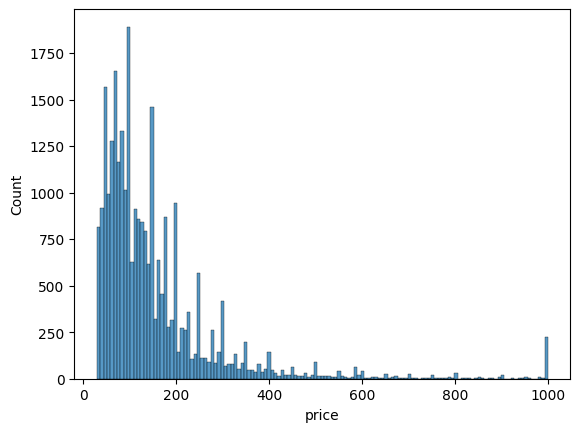

In [8]:
sns.histplot(data=df, x="price")

<AxesSubplot: xlabel='price', ylabel='Count'>

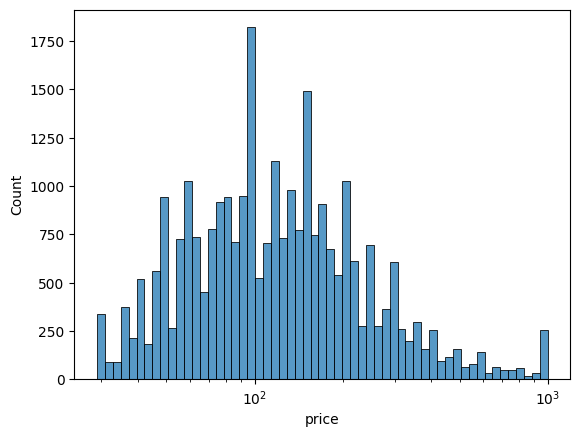

In [9]:
sns.histplot(data=df, x="price", log_scale=True)

**Numerical features to fill NaN values**

In [10]:
int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
has_nan = nan_count != 0 
to_impute = int_or_float & has_nan
to_impute = df.columns[to_impute]
to_impute

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds'], dtype='object')

**Identify categorical feature candidates for binary variable/one-hot encoding or feature removal**

In [11]:
is_obj = df.columns[df.dtypes == 'object']
df[is_obj].nunique()

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

**Identify possible feature creation**

In [12]:
df['amenities']

0        ["Extra pillows and blankets", "Baking sheet",...
1        ["Extra pillows and blankets", "Luggage dropof...
2        ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
3        ["Room-darkening shades", "Lock on bedroom doo...
4        ["Breakfast", "Carbon monoxide alarm", "Fire e...
                               ...                        
28017    ["Lock on bedroom door", "Hot water kettle", "...
28018    ["Kitchen", "Carbon monoxide alarm", "TV", "Wa...
28019    ["Hangers", "Keypad", "Kitchen", "Carbon monox...
28020    ["Luggage dropoff allowed", "Security cameras ...
28021    ["Air conditioning", "Hair dryer", "Fire extin...
Name: amenities, Length: 28022, dtype: object

In [13]:
df['amenities'].str.extractall(r'"([^,"]*)"')[0].value_counts().head(10) # Parse lists for most common ammenities

Wifi                       27347
Essentials                 25889
Long term stays allowed    25370
Smoke alarm                25319
Heating                    24898
Kitchen                    24865
Air conditioning           23722
Hangers                    22049
Carbon monoxide alarm      21623
Hair dryer                 19522
Name: 0, dtype: int64

**Correlation Matrix**

In [14]:
corr_matrix = round(df.corr(),5)
corr_matrix

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
host_response_rate,1.00000,0.50570,NaN,0.04142,0.04142,NaN,NaN,0.02646,0.02381,0.01856,0.02493,0.00648,-0.16826,-0.04235,-0.14625,-0.05092,-0.03157,-0.03504,-0.05492,-0.03513,0.03765,-0.18382,-0.12517,-0.10814,-0.06564,0.07686,0.14029,0.17792,0.12148,0.12541,0.12185,0.11931,0.06172,0.09078,0.10796,0.07688,0.04065,0.07999,-0.01693,0.10988,0.02388
host_acceptance_rate,0.50570,1.00000,NaN,0.04119,0.04119,NaN,NaN,0.06216,-0.00337,0.02250,0.03963,0.03755,-0.19448,-0.03842,-0.16769,-0.05389,0.01436,0.02982,-0.05777,0.02287,0.05544,-0.05960,0.01053,0.02463,0.01170,0.10900,0.23529,0.26511,0.01254,0.05359,0.00598,0.00537,0.00421,0.01025,0.35620,0.03884,0.06034,-0.02410,0.01249,0.18918,-0.07048
host_is_superhost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_listings_count,0.04142,0.04119,NaN,1.00000,1.00000,NaN,NaN,-0.00390,0.01326,-0.00477,-0.01508,0.08099,0.02302,-0.00068,0.09310,0.61235,-0.00176,-0.00223,0.60623,-0.00202,0.02168,0.00596,0.01080,0.01556,0.06920,-0.04817,-0.02100,-0.03008,-0.03320,-0.00737,-0.01720,-0.05056,0.00625,-0.07428,0.08557,0.50719,0.50887,0.16966,-0.00825,-0.02192,0.09153
host_total_listings_count,0.04142,0.04119,NaN,1.00000,1.00000,NaN,NaN,-0.00390,0.01326,-0.00477,-0.01508,0.08099,0.02302,-0.00068,0.09310,0.61235,-0.00176,-0.00223,0.60623,-0.00202,0.02168,0.00596,0.01080,0.01556,0.06920,-0.04817,-0.02100,-0.03008,-0.03320,-0.00737,-0.01720,-0.05056,0.00625,-0.07428,0.08557,0.50719,0.50887,0.16966,-0.00825,-0.02192,0.09153
host_has_profile_pic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_identity_verified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.02646,0.06216,NaN,-0.00390,-0.00390,NaN,NaN,1.00000,0.36944,0.74444,0.77465,0.51906,-0.06150,-0.00607,-0.06268,-0.04769,-0.00396,-0.01131,-0.05001,-0.00745,0.06852,0.04415,0.07892,0.08911,0.11510,0.06470,0.07965,0.08329,0.00780,0.03611,-0.00174,-0.00109,-0.01296,-0.00867,-0.00573,-0.06661,-0.00993,-0.10283,-0.04857,0.06738,-0.01672
bathrooms,0.02381,-0.00337,NaN,0.01326,0.01326,NaN,NaN,0.36944,1.00000,0.47798,0.38458,0.33130,-0.01273,-0.00205,-0.01481,-0.00884,-0.00903,-0.01177,-0.00904,-0.01008,0.03079,0.01909,0.02617,0.03359,0.06138,-0.03266,-0.00693,-0.00108,-0.00208,-0.00500,0.00052,-0.01703,-0.01795,-0.00605,-0.03001,-0.02253,-0.03200,0.00684,0.01755,-0.00837,0.01235
bedrooms,0.01856,0.02250,NaN,-0.00477,-0.00477,NaN,NaN,0.74444,0.47798,1.00000,0.75719,0.47551,-0.03059,0.00215,-0.03394,-0.02455,-0.01260,-0.01859,-0.02648,-0.01591,0.05335,0.01647,0.04640,0.05897,0.09700,0.00140,0.03416,0.03852,0.01153,0.03287,0.00657,-0.00031,-0.01096,0.00039,-0.04452,-0.05367,-0.00317,-0.08243,-0.05049,0.03172,-0.02397


In [15]:
corrs = corr_matrix['price']
corrs = corrs.sort_values(ascending=False)
corrs

price                                           1.00000
accommodates                                    0.51906
bedrooms                                        0.47551
beds                                            0.40924
bathrooms                                       0.33130
availability_60                                 0.15275
availability_90                                 0.14823
availability_30                                 0.14689
availability_365                                0.12398
maximum_maximum_nights                          0.10790
review_scores_location                          0.09661
maximum_nights_avg_ntm                          0.08159
review_scores_cleanliness                       0.08140
host_total_listings_count                       0.08099
host_listings_count                             0.08099
minimum_maximum_nights                          0.06401
has_availability                                0.06218
number_of_reviews_ltm                           

In [16]:
top_two_corr = corrs[2:4]
top_two_corr

bedrooms    0.47551
beds        0.40924
Name: price, dtype: float64

In [17]:
df_corrs = df[['price', 'beds', 'bedrooms']].copy()
df_corrs

,price,beds,bedrooms
0,150.0,1.0,NaN
1,75.0,3.0,1.0
2,275.0,2.0,2.0
3,68.0,1.0,1.0
4,75.0,1.0,1.0
...,...,...,...
28017,89.0,1.0,1.0
28018,1000.0,2.0,2.0
28019,64.0,1.0,1.0
28020,84.0,2.0,1.0


In [18]:
#sns.pairplot(data=df_corrs, kind='kde')

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

**Feature list:** remove redundant features, features with only one value, features with excessive null values  

**Data Preparation:** use one-hot encoding for viable categorical features, use winsorization to reduce outlier influence, replace NaN values with mean for numerical features.  

**Model:**  Linear Regression, SGDRegressor

**Plan**   
I plan to train my model on all features (after data preparation). To train, I will split the data into a training set and test set using train_test_split to later cross-validate my model with new data. I may also use K-fold validation to evaluate model performance.  I will analyze the model using RMSE and R^2 to gauge the general error of the prediction against the label and the variation. To further investigate, I will try an SGD Regressor model to see if iterative approaches work better for the problem.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [19]:
# YOUR CODE HERE
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [20]:
# YOUR CODE HERE
int_features = df.columns[df.dtypes == 'int64']
for feature in int_features:
    df[feature] = df[feature].astype(float)
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                    float64
bathrooms                                       float64
bedrooms                                        

## Data Preparation

**Winsorize label**

In [21]:
df['label_price'] = stats.mstats.winsorize(df['price'], limits=[0.01,0.01])

In [22]:
df = df.drop(columns='price')
df.shape

(28022, 50)

<AxesSubplot: xlabel='label_price', ylabel='Count'>

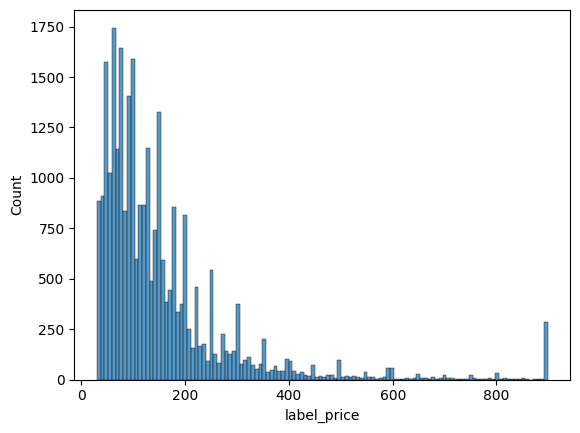

In [23]:
sns.histplot(data=df, x="label_price")

In [24]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant

In [25]:
df.head(20)

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,room_type,accommodates,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,label_price
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,8.0,True,True,Manhattan,Entire home/apt,1.0,1.0,NaN,1.0,"[""Extra pillows and blankets"", ""Baking sheet"",...",30.0,1125.0,30.0,30.0,1125.0,1125.0,30.0,1125.0,True,3.0,33.0,63.0,338.0,48.0,0.0,0.0,4.70,4.62,4.76,4.79,4.86,4.41,False,3.0,3.0,0.0,0.0,0.33,9.0,150.0
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,3.0,1.0,1.0,3.0,"[""Extra pillows and blankets"", ""Luggage dropof...",1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,True,3.0,6.0,18.0,194.0,409.0,32.0,0.0,4.45,4.49,4.78,4.80,4.71,4.64,False,1.0,1.0,0.0,0.0,4.86,6.0,75.0
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,1.0,True,True,Brooklyn,Entire home/apt,4.0,1.5,2.0,2.0,"[""Kitchen"", ""BBQ grill"", ""Cable TV"", ""Carbon m...",5.0,1125.0,5.0,5.0,1125.0,1125.0,5.0,1125.0,True,3.0,3.0,12.0,123.0,2.0,1.0,0.0,5.00,5.00,5.00,5.00,4.50,5.00,False,1.0,1.0,0.0,0.0,0.02,3.0,275.0
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,1.0,True,True,Manhattan,Private room,2.0,1.0,1.0,1.0,"[""Room-darkening shades"", ""Lock on bedroom doo...",2.0,14.0,2.0,2.0,14.0,14.0,2.0,14.0,True,1.0,16.0,34.0,192.0,507.0,33.0,2.0,4.21,3.73,4.66,4.42,4.87,4.36,False,1.0,0.0,1.0,0.0,3.68,4.0,68.0
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,1.0,True,True,Manhattan,Private room,1.0,1.0,1.0,1.0,"[""Breakfast"", ""Carbon monoxide alarm"", ""Fire e...",2.0,14.0,2.0,2.0,14.0,14.0,2.0,14.0,True,0.0,0.0,0.0,0.0,118.0,0.0,0.0,4.91,4.82,4.97,4.95,4.94,4.92,False,1.0,0.0,1.0,0.0,0.87,7.0,75.0
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,3.0,True,True,Brooklyn,Private room,2.0,1.5,1.0,NaN,"[""Gym nearby"", ""Backyard"", ""Outdoor furniture""...",4.0,21.0,4.0,4.0,21.0,21.0,4.0,21.0,True,2.0,17.0,47.0,322.0,204.0,23.0,2.0,4.70,4.61,4.79,4.82,4.87,4.73,False,3.0,1.0,2.0,0

In [26]:
df.shape

(28022, 50)

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


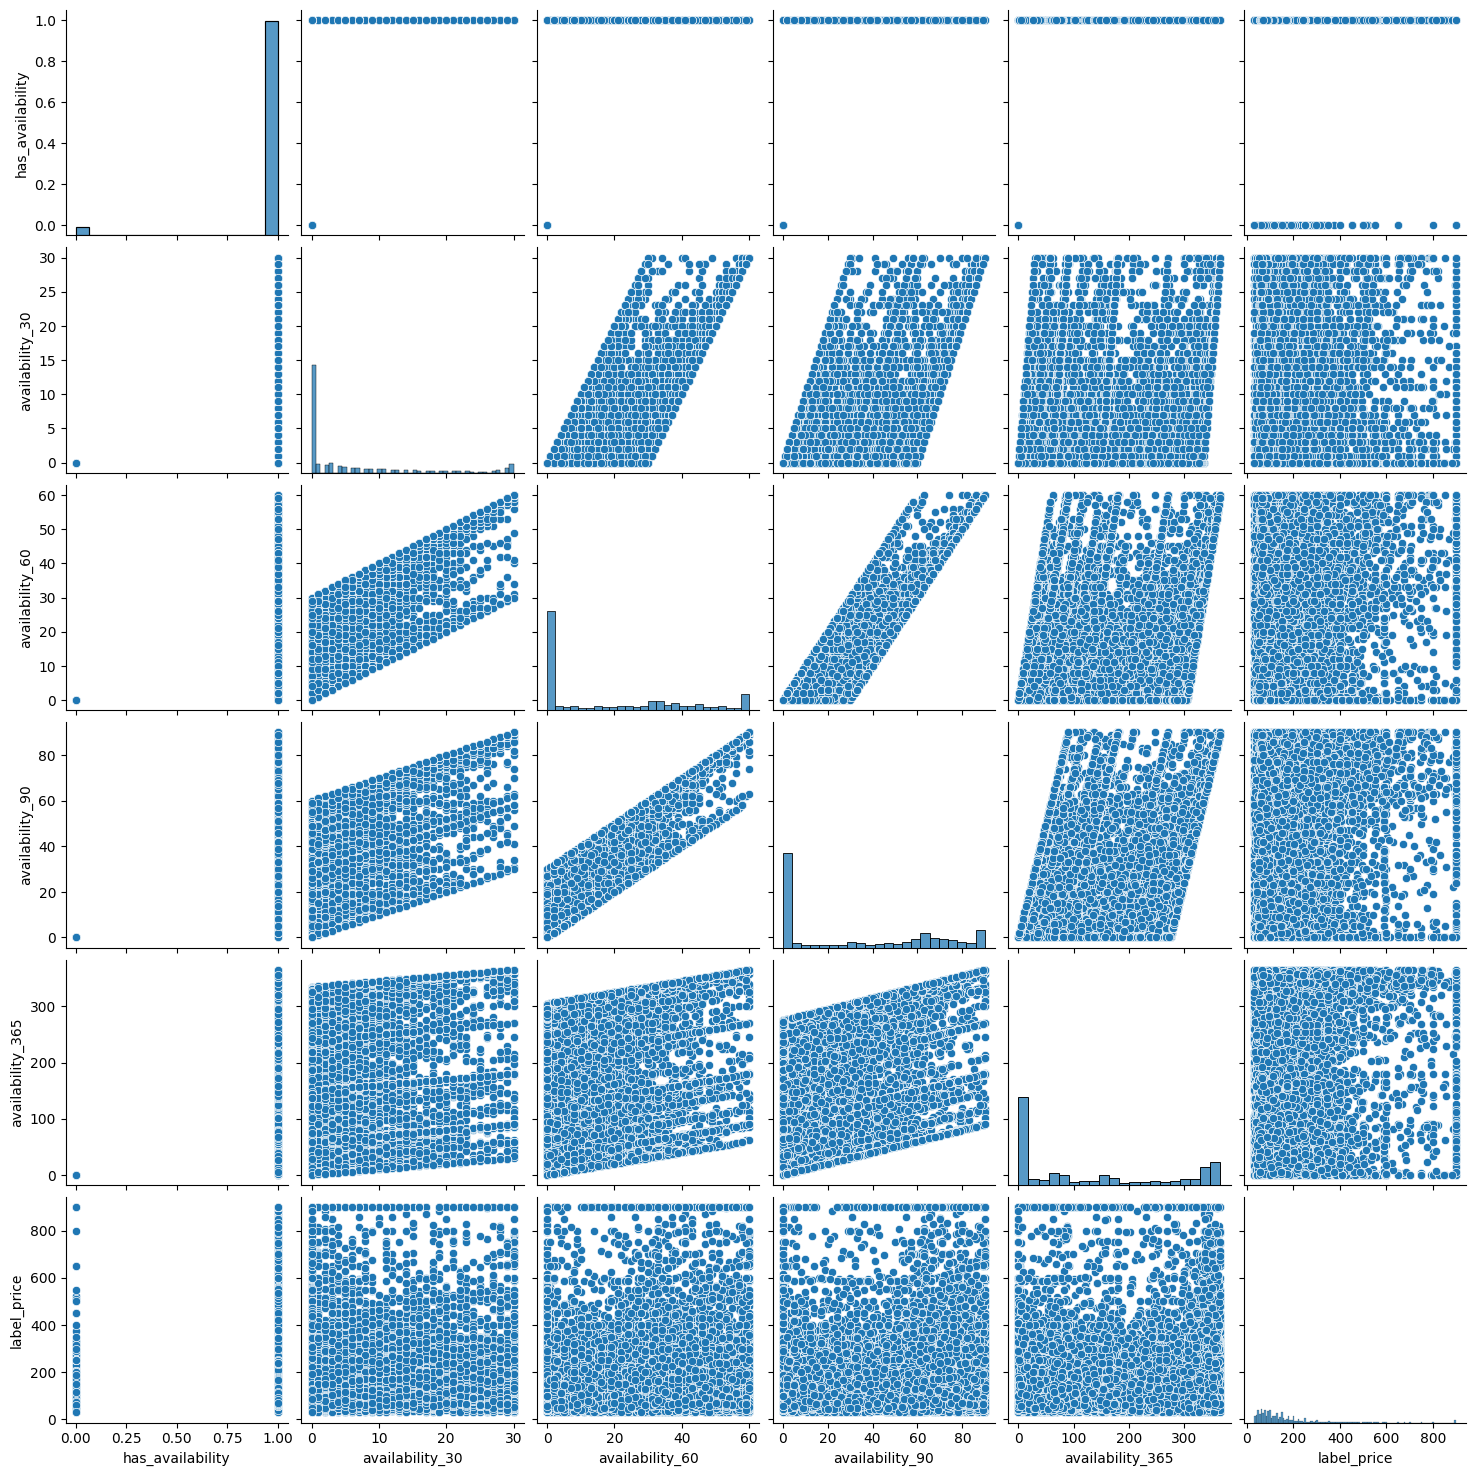

In [27]:
df_sub = df[['has_availability', 'availability_30', 'availability_60', 'availability_90','availability_365', 'label_price']].copy() 
sns.pairplot(data=df_sub)

In [28]:
df = df.drop(columns=['name', 'host_name', 'host_listings_count', 'host_total_listings_count','minimum_nights','maximum_nights',
                      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights', 
                      'has_availability', 'availability_30', 'availability_90', 'availability_365',
                      'number_of_reviews_ltm', 'number_of_reviews_l30d', 
                     'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                     'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
                       'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms', 
                      'reviews_per_month','n_host_verifications'])
df.shape

(28022, 25)

**Impute numerical data**

In [29]:
df[to_impute].head()

,host_response_rate,host_acceptance_rate,bedrooms,beds
0,0.80,0.17,NaN,1.0
1,0.09,0.69,1.0,3.0
2,1.00,0.25,2.0,2.0
3,1.00,1.00,1.0,1.0
4,NaN,NaN,1.0,1.0


In [30]:
to_impute_nan_count = np.sum(df[to_impute].isnull(), axis=0)
to_impute_nan_count

host_response_rate      11843
host_acceptance_rate    11113
bedrooms                 2918
beds                     1354
dtype: int64

In [31]:
to_impute_select = ['bedrooms', 'beds'] # 'host_response_rate' and 'host_acceptance_rate' removed due to having > ~40% NaN values

In [32]:
for feature in to_impute_select:
    mean = df[feature].mean()
    df[feature].fillna(value=mean, inplace=True)

In [33]:
imputed_nan_count = np.sum(df[to_impute_select].isnull(), axis=0)
imputed_nan_count

bedrooms    0
beds        0
dtype: int64

**Deal with remaining numerical features with NaN values**

In [34]:
nan_count = np.sum(df.isnull(), axis=0)
nan_count[nan_count > 0]

description                570
neighborhood_overview     9816
host_location               60
host_about               10945
host_response_rate       11843
host_acceptance_rate     11113
dtype: int64

In [35]:
# Remove features with large % of NaN values
df = df.drop(columns=['host_response_rate','host_acceptance_rate'])
df.shape

(28022, 23)

**Deal with non-numerical data**

In [36]:
df['instant_bookable'] = df['instant_bookable'].astype(int)

In [37]:
obj_features = df.columns[df.dtypes == object]
df[obj_features].columns

Index(['description', 'neighborhood_overview', 'host_location', 'host_about',
       'neighbourhood_group_cleansed', 'room_type', 'amenities'],
      dtype='object')

In [38]:
df[obj_features].nunique()

description                     25952
neighborhood_overview           15800
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [39]:
df = df.drop(columns=['description', 'neighborhood_overview', 
                     'host_location', 'host_about']) # Irrelavant feature
df.shape

(28022, 19)

**One-hot encoding features**

In [40]:
df_room_type = pd.get_dummies(df['room_type'])
df_room_type

,Entire home/apt,Hotel room,Private room,Shared room
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
28017,0,0,1,0
28018,1,0,0,0
28019,0,0,1,0
28020,1,0,0,0


In [41]:
df = df.join(df_room_type)
df.drop(columns='room_type', inplace=True)
df.shape

(28022, 22)

In [42]:
df_neighbourhood_group_cleansed = pd.get_dummies(df['neighbourhood_group_cleansed'])
df_neighbourhood_group_cleansed

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
28017,0,0,0,1,0
28018,0,1,0,0,0
28019,0,1,0,0,0
28020,0,1,0,0,0


In [43]:
df = df.join(df_neighbourhood_group_cleansed)
df.drop(columns='neighbourhood_group_cleansed', inplace=True)
df.shape

(28022, 26)

In [44]:
# General overview of available ammenities across all listings
amenity_percentages = (df['amenities'].str.extractall(r'"([^,"]*)"')[0].value_counts() / df.shape[0] * 100).round(2)
amenity_percentages.head(50)

Wifi                            97.59
Essentials                      92.39
Long term stays allowed         90.54
Smoke alarm                     90.35
Heating                         88.85
Kitchen                         88.73
Air conditioning                84.65
Hangers                         78.68
Carbon monoxide alarm           77.16
Hair dryer                      69.67
Iron                            67.92
Hot water                       67.83
Shampoo                         66.71
Dedicated workspace             64.25
Dishes and silverware           56.26
Refrigerator                    53.72
Cooking basics                  52.59
Microwave                       48.83
TV                              48.37
Free street parking             46.01
Fire extinguisher               44.16
Coffee maker                    44.12
Bed linens                      43.52
Stove                           42.61
Oven                            41.81
First aid kit                   39.17
Washer      

In [45]:
# Hollistically chosing select amenities & creating binary variables
df['has_kitchen'] = df['amenities'].str.contains('Kitchen', case=False, na=False).astype(int)
df['has_air_conditioning'] = df['amenities'].str.contains('Air conditioning', case=False, na=False).astype(int)
df['has_dedicated_workspace'] = df['amenities'].str.contains('Dedicated workspace', case=False, na=False).astype(int)
df['has_heating'] = df['amenities'].str.contains('Heating', case=False, na=False).astype(int)
df['has_free_street_parking'] = df['amenities'].str.contains('Free street parking', case=False, na=False).astype(int)

df = df.drop(columns='amenities')
df.shape

(28022, 30)

In [46]:
df_summary = df.describe(include='all')
df_summary

,accommodates,bathrooms,bedrooms,beds,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_60,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,label_price,Entire home/apt,Hotel room,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island,has_kitchen,has_air_conditioning,has_dedicated_workspace,has_heating,has_free_street_parking
count,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,2.802200e+04,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,2.874491,1.142174,1.329708,1.629556,20.042431,2.419200e+06,19.180608,31.589965,4.683482,4.613352,4.814300,4.808041,4.750393,4.647670,0.272643,153.360788,0.556848,0.004889,0.424702,0.013561,0.029905,0.401756,0.415352,0.142852,0.010135,0.887374,0.863786,0.678217,0.948398,0.460103
std,1.860251,0.421132,0.663238,1.070269,39.033701,6.790497e+07,21.035941,56.299006,0.505857,0.573891,0.438603,0.464585,0.415717,0.518023,0.445327,135.779963,0.496767,0.069752,0.494307,0.115661,0.170328,0.490262,0.492791,0.349928,0.100163,0.316140,0.343022,0.467169,0.221227,0.498415
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,3.000000e+02,0.000000,3.000000,4.600000,4.500000,4.810000,4.810000,4.670000,4.550000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,30.000000,1.125000e+03,10.000000,9.000000,4.830000,4.800000,4.960000,4.970000,4.880000,4.780000,0.000000,115.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,1.000000,1.329708,2.000000,30.000000,1.125000e+03,36.000000,33.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,180.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,12.000000,21.000000,1250.000000,2.147484e+09,60.000000,1009.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,899.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model building/training

## Linear Regression Model

In [47]:
y = df['label_price']
features = df.drop(columns='label_price').columns
X = df[features]
print(X)

       accommodates  bathrooms  bedrooms  beds  minimum_nights_avg_ntm  \
0               1.0        1.0  1.329708   1.0                    30.0   
1               3.0        1.0  1.000000   3.0                     1.0   
2               4.0        1.5  2.000000   2.0                     5.0   
3               2.0        1.0  1.000000   1.0                     2.0   
4               1.0        1.0  1.000000   1.0                     2.0   
...             ...        ...       ...   ...                     ...   
28017           2.0        1.0  1.000000   1.0                     1.0   
28018           6.0        1.0  2.000000   2.0                     1.0   
28019           2.0        2.0  1.000000   1.0                     1.0   
28020           3.0        1.0  1.000000   2.0                     7.1   
28021           1.0        1.0  1.000000   1.0                     1.0   

       maximum_nights_avg_ntm  availability_60  number_of_reviews  \
0                      1125.0             

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
print(X_train.shape)
print(X_test.shape)

(19615, 29)
(8407, 29)


**Build model**

In [50]:
linreg_model = LinearRegression()

linreg_model.fit(X_train, y_train)

prediction = linreg_model.predict(X_test)

**Model Analysis**

In [51]:
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   99.03
 R^2 =   0.45


RMSE tells us that predictions are on average $100 away from actual price.  
R^2 values tells us model has moderate prediction capabilities

**K-fold validation**

In [52]:
scores = cross_val_score(linreg_model, X, y, cv=10, scoring='neg_root_mean_squared_error')

rmse_scores = -scores

print(f"Mean Squared Error scores for each fold: {rmse_scores}")
print(f"Average Mean Squared Error: {np.mean(rmse_scores)}")

Mean Squared Error scores for each fold: [ 89.50402126  89.41967533  89.2613663   91.6650128   86.53248141
  98.46163341 118.55472818 110.32827071 118.57416266 107.1557757 ]
Average Mean Squared Error: 99.9457127753083


**Investigate model weights**

In [53]:
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , linreg_model.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in linreg_model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -103.49580406357205

Weights:
w_ 1 =  23.19902722024319  [ weight of  accommodates ]
w_ 2 =  55.58331013135217  [ weight of  bathrooms ]
w_ 3 =  27.404192562427134  [ weight of  bedrooms ]
w_ 4 =  -4.251699828943186  [ weight of  beds ]
w_ 5 =  -0.026325104663112425  [ weight of  minimum_nights_avg_ntm ]
w_ 6 =  1.0827394599472417e-07  [ weight of  maximum_nights_avg_ntm ]
w_ 7 =  0.9611282161565964  [ weight of  availability_60 ]
w_ 8 =  -0.09518080156755167  [ weight of  number_of_reviews ]
w_ 9 =  18.684425282004433  [ weight of  review_scores_rating ]
w_ 10 =  15.25614493352845  [ weight of  review_scores_cleanliness ]
w_ 11 =  -15.790478362024604  [ weight of  review_scores_checkin ]
w_ 12 =  -2.250804178388071  [ weight of  review_scores_communication ]
w_ 13 =  27.9115748394112  [ weight of  review_scores_location ]
w_ 14 =  -19.50381950266351  [ weight of  review_scores_value ]
w_ 15 =  9.322208727600662  [ weight of  instant_bookable ]
w_ 16

## Linear regression model overview:
Overall, the model does moderately well. The RMSE value is less than the std of the label (RMSE avg ~ 100, std ~140)

**Alternate strategy:** Feature selection w/ linear regression model

## Using k best features for linear regression model

In [54]:
fs = SelectKBest(score_func=f_regression, k=29)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [55]:
linreg_kfeat_model = LinearRegression()

linreg_kfeat_model.fit(X_train_fs, y_train)

prediction = linreg_kfeat_model.predict(X_test_fs)

In [56]:
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   99.03
 R^2 =   0.45


**Test results**
k=10: RMSE =   102.64
 R^2 =   0.40  
 k=15:RMSE =   99.87
 R^2 =   0.43  
 k=20:RMSE =   99.23
 R^2 =   0.44  
 k=25:RMSE =   99.23
 R^2 =   0.44  
 k=29:RMSE =   98.08
 R^2 =   0.45

## Linear regression model (with select features) overview:
Through empirical testing, k=29 yields the best results (improvement in RMSE and R^2 as more features are added), showing that linreg model works best with all features used. This is the same result as the first iteration of the linear regression model

**Alternate strategy:** SGD regressor for iterative training

## SGD Regressor

In [57]:
SGD_model = SGDRegressor(loss='squared_error', max_iter=1000, tol=0.01, learning_rate='constant')

SGD_model.fit(X_train, y_train)

prediction = SGD_model.predict(X_test)

In [58]:
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   961507040511521691025801216.00
 R^2 =   -51682629543106887204978685867404108955433687842816.00


**Grid search for hyperparamter tuning**

In [59]:
loss_param = ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalty_param = ['l1', 'l2', None]
max_iter_param = [250 * n for n in range(1, 21)]
tol_param = [0.001, 0.01, 0.1]
learning_rate_param = ['invscaling', 'constant', 'optimal']

param_grid={'loss':loss_param, 'penalty':penalty_param, 'max_iter':max_iter_param, 'tol':tol_param, 'learning_rate':learning_rate_param}
param_grid

{'loss': ['squared_error',
  'huber',
  'epsilon_insensitive',
  'squared_epsilon_insensitive'],
 'penalty': ['l1', 'l2', None],
 'max_iter': [250,
  500,
  750,
  1000,
  1250,
  1500,
  1750,
  2000,
  2250,
  2500,
  2750,
  3000,
  3250,
  3500,
  3750,
  4000,
  4250,
  4500,
  4750,
  5000],
 'tol': [0.001, 0.01, 0.1],
 'learning_rate': ['invscaling', 'constant', 'optimal']}

In [60]:
print('Running Grid Search...')

model = SGDRegressor()

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [61]:
best_loss = grid_search.best_estimator_.loss
best_penalty = grid_search.best_estimator_.penalty
best_max_iter = grid_search.best_estimator_.max_iter
best_tol = grid_search.best_estimator_.tol
best_lr = grid_search.best_estimator_.learning_rate

print('Best loss: {0}'.format(best_loss))
print('Best penalty: {0}'.format(best_penalty))
print('Best max iterations: {0}'.format(best_max_iter))
print('Best tol: {0}'.format(best_tol))
print('Best learning rate: {0}'.format(best_lr))

print('Best score: {0}'.format(grid_search.best_score_))

Best loss: huber
Best penalty: None
Best max iterations: 3250
Best tol: 0.01
Best learning rate: invscaling
Best score: -2.0664029994895106e+19


In [62]:
SGDR_best_model = SGDRegressor(loss='squared_error', penalty=None, max_iter=5000, tol=0.1, learning_rate='invscaling')
    
SGDR_best_model.fit(X_train, y_train)

prediction = SGDR_best_model.predict(X_test)


In [63]:
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   3453315234932029753655296.00
 R^2 =   -666671844198698472827068328279478955258413056.00


## SGDRegressor overview
Above shows that the dataset is not benefitted by an iterative approach. In fact, it does pretty horribly, but I'm glad I did it I mean I couldn't really do anything with a linear regression model


## Binary Classification
**Problem:** Instead of predicting continuous numerical values, turn the ML problem into a binary classification task to predict if the listing will be over the average listing price (=>150) or under the average listing price (<150)

**Model:**  Logistic Regression, Decision Trees

**Plan**  Train models and optimize hyperparams with gridsearch. Analyze with accuracy scores.

## Logistic Regression

**Data preparation - turn label into binary (1 for =>150, 0 for <150)**

In [64]:
df['label_price'] = np.where(df['label_price'] >= 150, 1, 0)

In [65]:
df['label_price']

0        1
1        0
2        1
3        0
4        0
        ..
28017    0
28018    1
28019    0
28020    0
28021    0
Name: label_price, Length: 28022, dtype: int64

In [66]:
X = df[features]
y = df['label_price']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [68]:
print(X_train.shape)
print(X_test.shape)

(23818, 29)
(4204, 29)


**preliminary hyperparam testing**

In [69]:
logreg_model = LogisticRegression(C=10, max_iter=1000, penalty='l1', solver='liblinear')

logreg_model.fit(X_train, y_train)
    
probability_predictions = logreg_model.predict_proba(X_test)

l_loss = log_loss(y_test, probability_predictions)

class_label_predictions = logreg_model.predict(X_test)

acc_score = accuracy_score(y_test, class_label_predictions)

In [70]:
print(f"log loss: {l_loss}")
print(f"accuracy: {acc_score}")

log loss: 0.426852589485795
accuracy: 0.7844909609895337


**Grid search for hyperparamter tuning**

In [71]:
param_grid = {
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],        
        'max_iter': [100, 200, 500, 1000]}

In [72]:
print('Running Grid Search...')

model = LogisticRegression()

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home

Done


In [73]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")


Best parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7796


In [74]:
logreg_best_model = LogisticRegression(C=1, max_iter=1500, penalty='l1', solver='liblinear')

logreg_best_model.fit(X_train, y_train)
    
probability_predictions = logreg_best_model.predict_proba(X_test)

l_loss = log_loss(y_test, probability_predictions)


class_label_predictions = logreg_best_model.predict(X_test)

logreg_acc_score = accuracy_score(y_test, class_label_predictions)

In [75]:
print(f"log loss: {l_loss}")
print(f"accuracy: {logreg_acc_score}")

log loss: 0.4266892434601287
accuracy: 0.7840152235965747


## Decision Tree
Test DT on binary classification task, compare performance with Logistic regression model

**preliminary hyperparam testing**

In [76]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1)

DT_model.fit(X_train, y_train)

class_label_predictions = DT_model.predict(X_test)
  
DT_acc_score = accuracy_score(y_test, class_label_predictions)
print(f"accuracy: {DT_acc_score}")

accuracy: 0.8127973358705994


**Grid search for hyperparamter tuning**

In [77]:
md = [2**n for n in range(2,6)]
msl = [25*2**n for n in range(0,3)]
param_grid={'max_depth':md, 'min_samples_leaf':msl}
param_grid={'max_depth':md, 'min_samples_leaf':msl}
param_grid

{'max_depth': [4, 8, 16, 32], 'min_samples_leaf': [25, 50, 100]}

In [78]:
print('Running Grid Search...')

model = DecisionTreeClassifier()

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Done


In [79]:
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 8, 'min_samples_leaf': 50}
Best score: 0.7994


In [80]:
DT_best_model = DecisionTreeClassifier(max_depth = 8, min_samples_leaf=25)

DT_best_model.fit(X_train, y_train)

class_label_predictions = DT_best_model.predict(X_test)

acc_score = accuracy_score(y_test, class_label_predictions)

print('Accuracy score: {0}'.format(acc_score))

Accuracy score: 0.8118458610846813


## Decision Tree analysis
DT is better at predicting labels accurately in comparision to logisitc regression, generalizes well

## Final Conclusions
For a regression price predicting task, best model to use is the linear regression model with all features. Results in predictions that are ~100 away from true label value.
For a binary classification task identifying if listings are over or under the mean, DT is the best model with 80% accuracy